In [1]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

import sys
sys.path.insert(0, '../src')
from pssm_scoring import *
from logo_plot import *
# from nuclear_protein_prediction import *

In [2]:
try:
    import logomaker
    print("logomaker is installed.")
except ImportError:
    print("logomaker is not installed, installing now...")
    %pip install logomaker
    import logomaker



logomaker is installed.


In [3]:
# compute the pssm scores at each location of the protein sequence and return the locations and scores above a threshold

def compute_scores(pssm, sequence, threshold=2):
    
    sequence_scores = pssm.calculate(sequence)
    results = pssm.search(sequence,threshold)
    return sequence_scores, results



In [4]:
# Load the nuclear pssm from the file
with open('../data/nls_pssm.pkl', 'rb') as f:
    nls_pssm = pickle.load(f)

The scores are [-30.31198    -31.35334    -31.729593   -27.698637   -28.633772
 -18.67158    -26.772833   -11.950617   -20.783901   -16.37563
 -19.165361   -10.606755   -14.605328    -9.7666025   -6.6036334
  -5.9131775   -3.9671738   -7.6530733   -7.3420134   -7.3363037
 -15.390048    -6.575034    -5.9958205  -13.371433   -10.859443
  -8.0693245   -4.370703    -6.1188035   -2.7276595   -7.5500145
  -5.9807024   -4.721002   -11.685133    -5.7046676  -10.519414
  -7.2277513   -4.530967   -10.373746    -9.941759    -9.36231
  -2.8288305    2.0211203   -2.3391495   -7.5914226    1.3503138
  -4.9850583   -1.5072048   -4.423934   -12.9065075   -6.5986357
  -5.0500636    0.88640904  -0.65136844  -5.4416323  -14.855409
   0.92963916 -10.9313135   -7.880858    -1.40938     -8.229595
  -4.835241    -8.465644   -11.86329     -8.240046    -6.083867
  -5.1415844   -6.164671   -11.268245   -10.834898    -7.851895
  -8.490782    -9.899975    -4.8334107  -17.333      -14.365383
 -13.652126   -10.1838

/Users/mingzhang/anaconda3/lib/python3.11/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


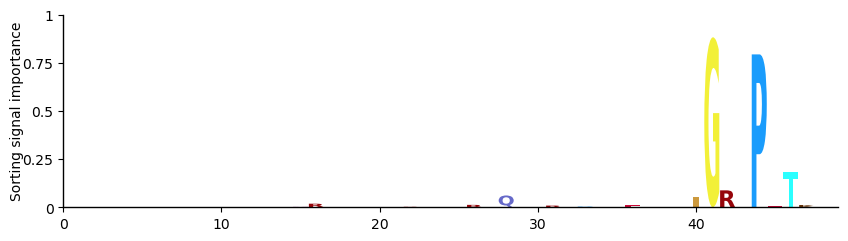

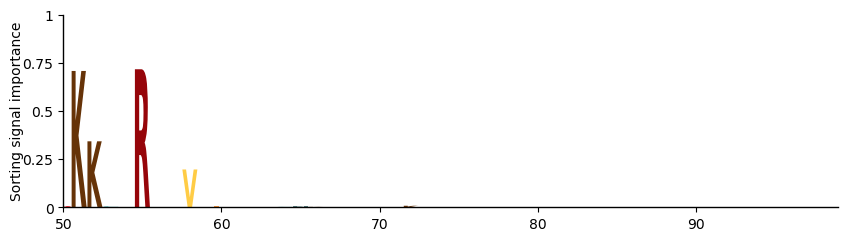

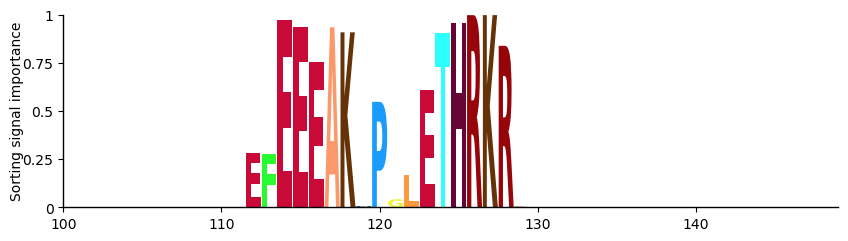

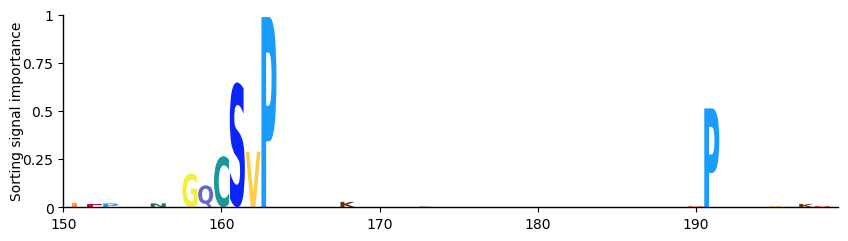

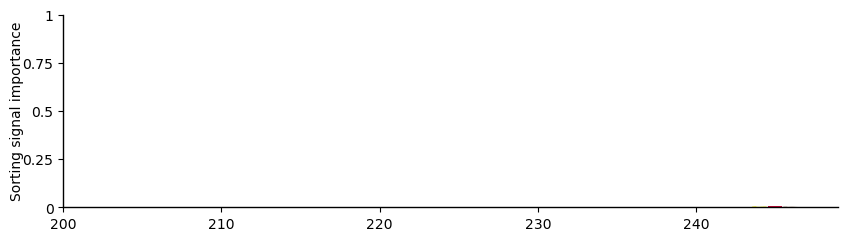

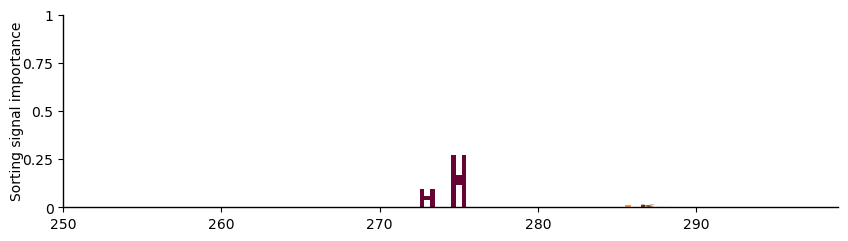

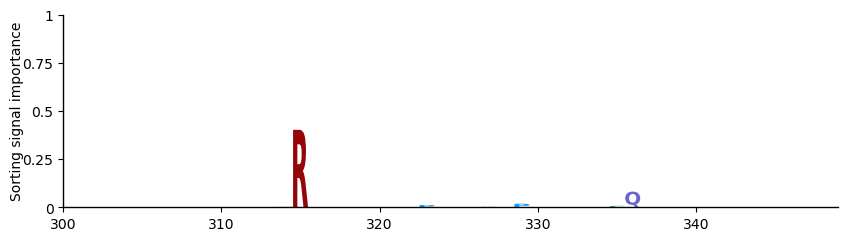

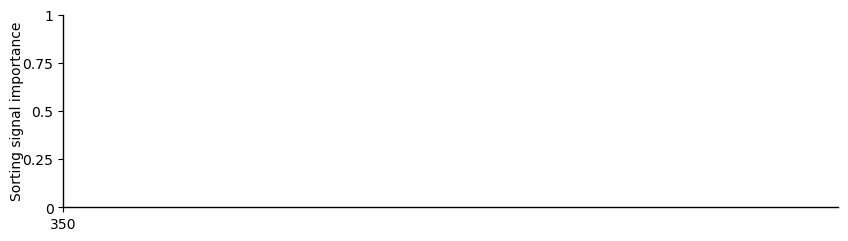

In [5]:
# Example 1
sequence = """MSNVNLSVSDFWRVMMRVCWLVRQDSRHQRIRLPHLEAVVIGRGPETKITDKKCSRQQVQ
LKAECNKGYVKVKQVGVNPTSIDSVVIGKDQEVKLQPGQVLHMVNELYPYIVEFEEEAKN
PGLETHRKRKRSGNSDSIERDAAQEAEAGTGLEPGSNSGQCSVPLKKGKDAPIKKESLGH
WSQGLKISMQDPKMQVYKDEQVVVIKDKYPKARYHWLVLPWTSISSLKAVAREHLELLKH
MHTVGEKVIVDFAGSSKLRFRLGYHAIPSMSHVHLHVISQDFDSPCLKNKKHWNSFNTEY
FLESQAVIEMVQEAGRVTVRDGMPELLKLPLRCHECQQLLPSIPQLKEHLRKHWTQ"""

sequence = sequence.replace('\n','')

"""
compute the pssm scores for each location of the protein sequence and search for locations whose scores are higher than
the threshold
"""
sequence_scores, results = compute_scores(nls_pssm, sequence, threshold = 2)

print(f"The scores are {sequence_scores}")
print()
for index, score in results:
    print(f"Match begins at {index+1} with score {score} and amino acid {sequence[index]}")

# Generate the logo
generate_logo(sequence, sequence_scores)

The scores are [-12.794986 -11.491377  -9.037239 ... -15.493091 -29.524712 -25.605972]

Match begins at 17 with score 11.52465534210205 and amino acid R
Match begins at 16 with score 8.754356384277344 and amino acid E
Match begins at 1801 with score 6.622623443603516 and amino acid K
Match begins at 1083 with score 6.074965476989746 and amino acid P
Match begins at 1085 with score 5.966554641723633 and amino acid S
Match begins at 1785 with score 5.820119380950928 and amino acid S
Match begins at 1940 with score 5.25134801864624 and amino acid R
Match begins at 1799 with score 5.232805252075195 and amino acid K
Match begins at 246 with score 5.1807169914245605 and amino acid K
Match begins at 1953 with score 4.7752275466918945 and amino acid R
Match begins at 1786 with score 4.587174415588379 and amino acid Q
Match begins at 1441 with score 4.506145477294922 and amino acid K
Match begins at 42 with score 4.473630428314209 and amino acid E
Match begins at 992 with score 4.44174003601074

/Users/mingzhang/anaconda3/lib/python3.11/site-packages/logomaker/src/Logo.py:194: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=self.figsize)


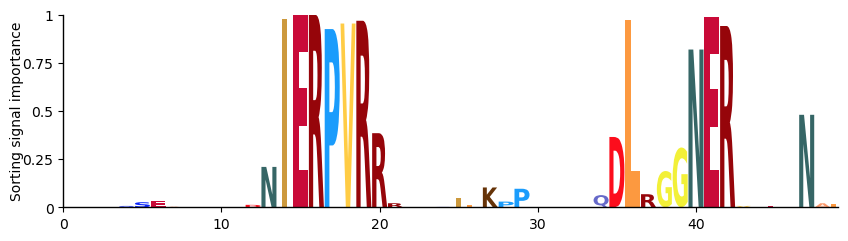

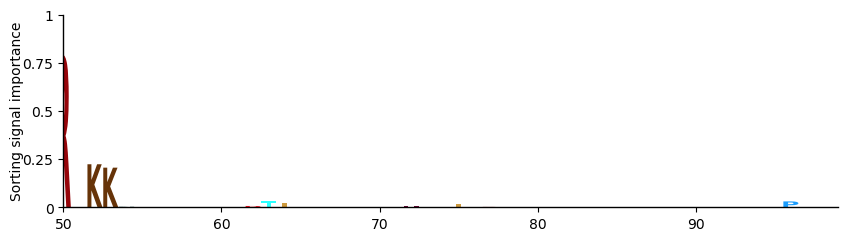

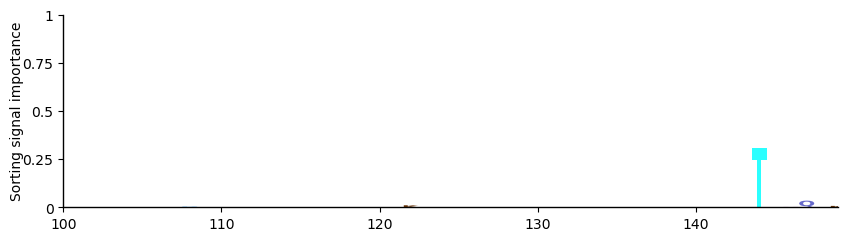

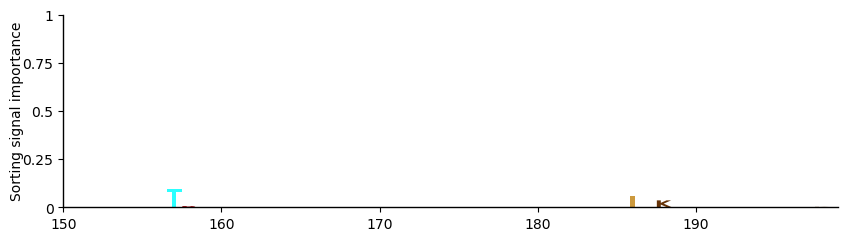

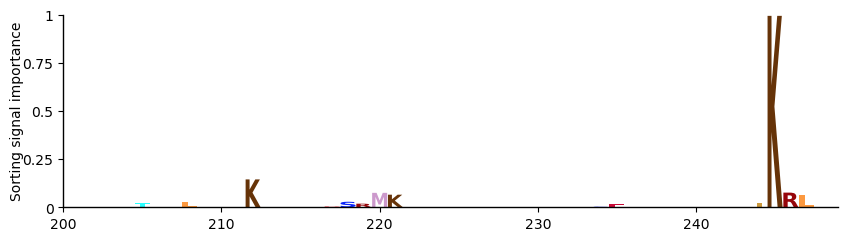

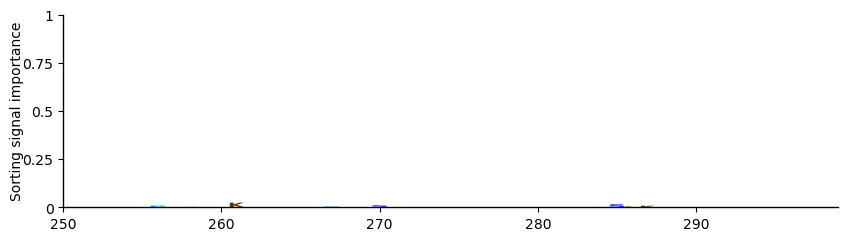

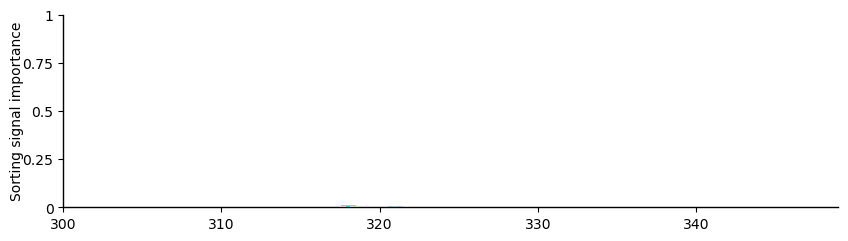

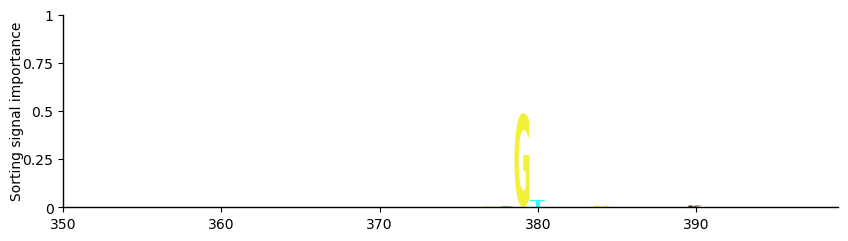

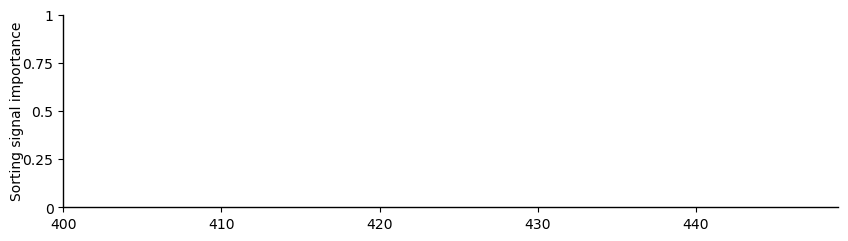

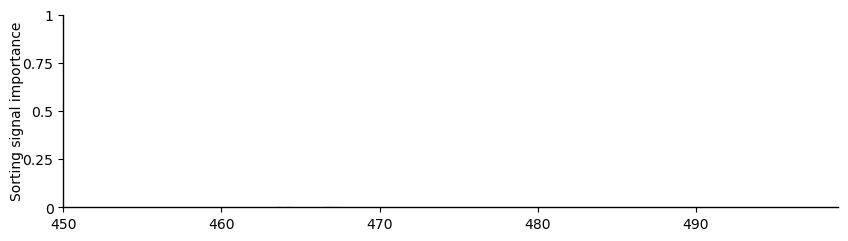

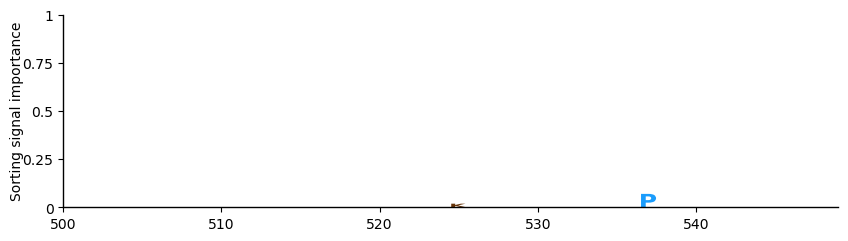

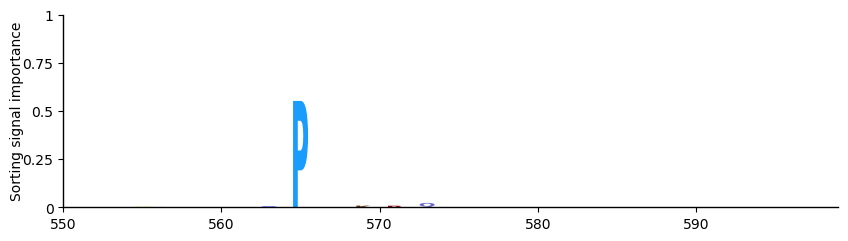

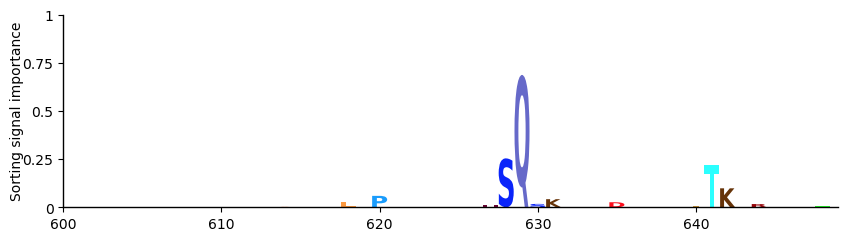

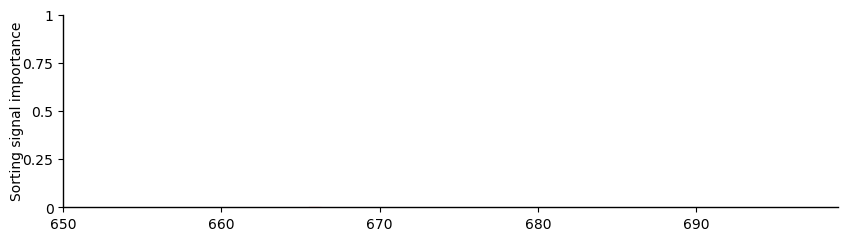

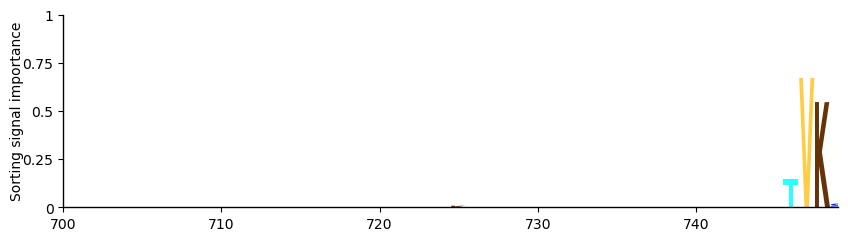

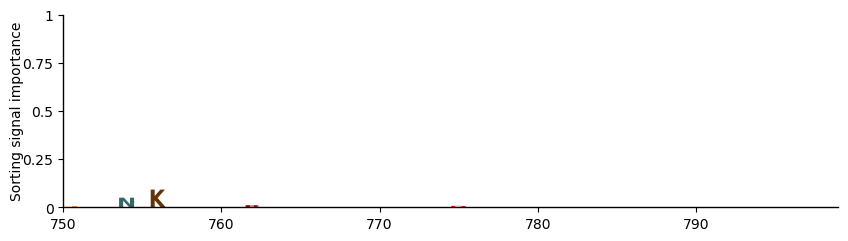

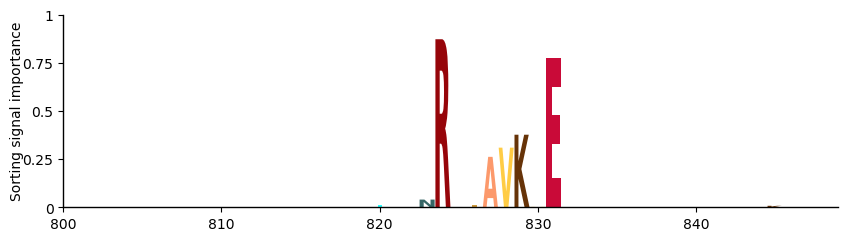

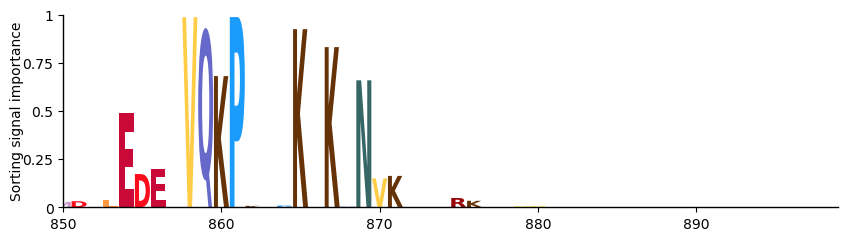

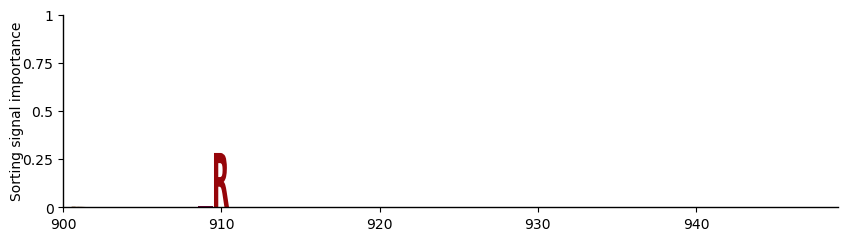

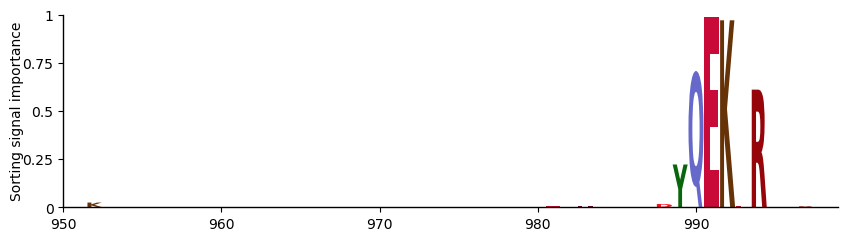

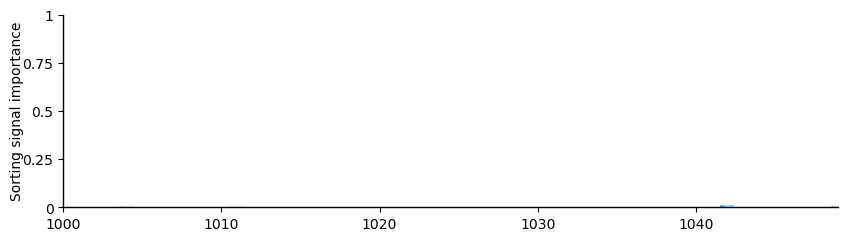

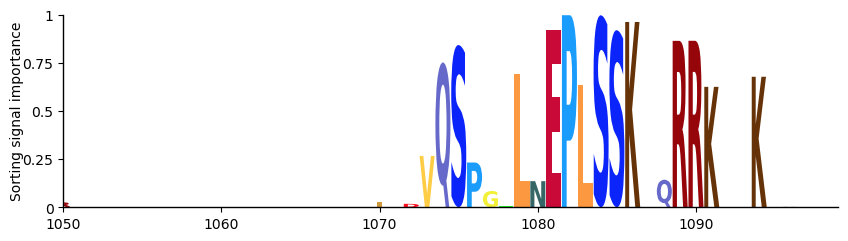

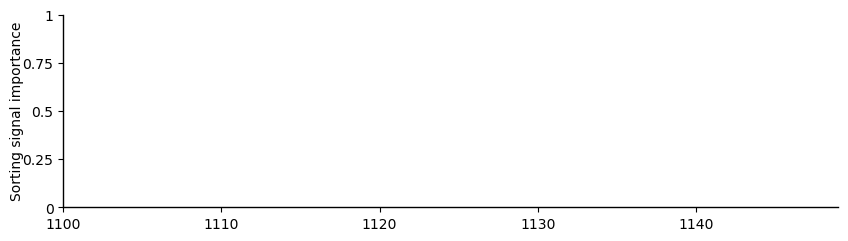

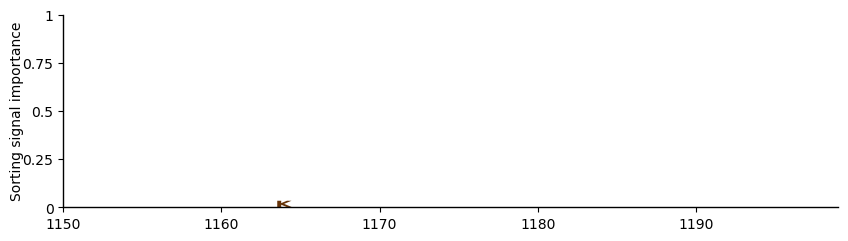

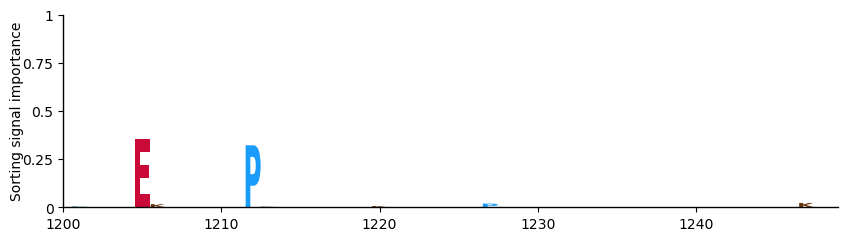

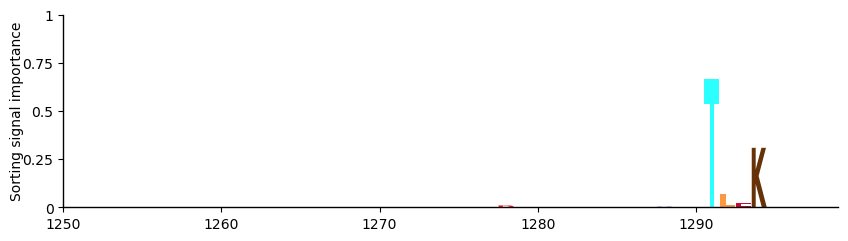

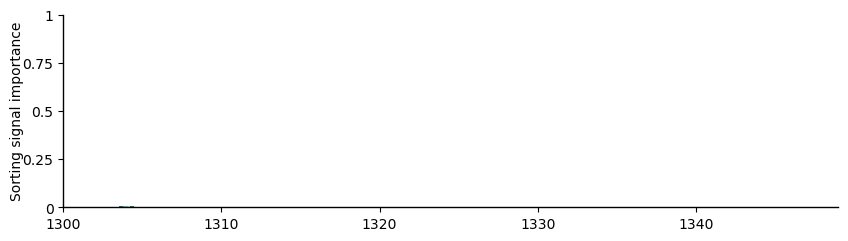

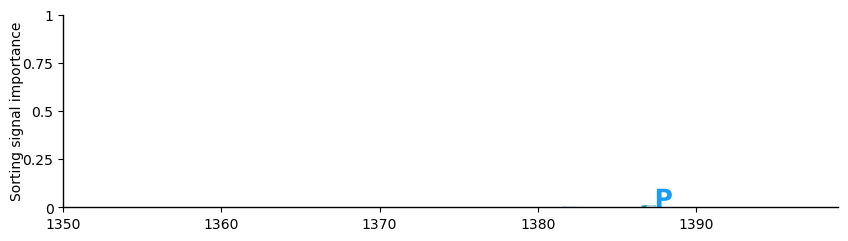

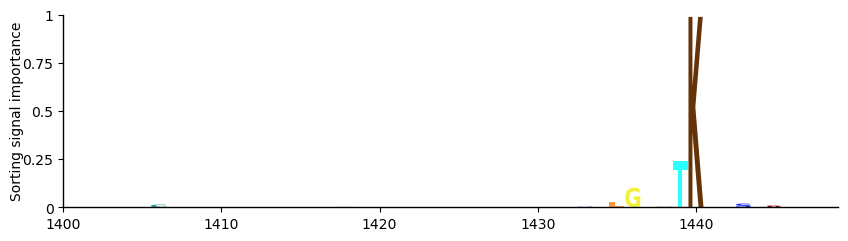

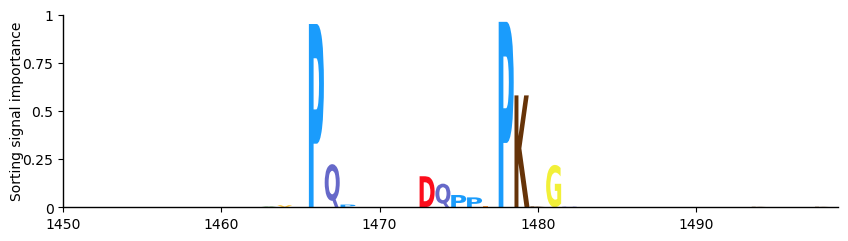

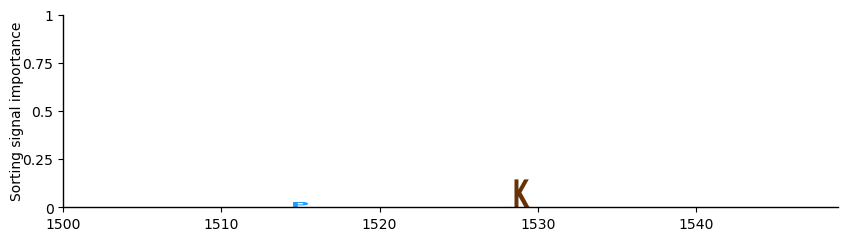

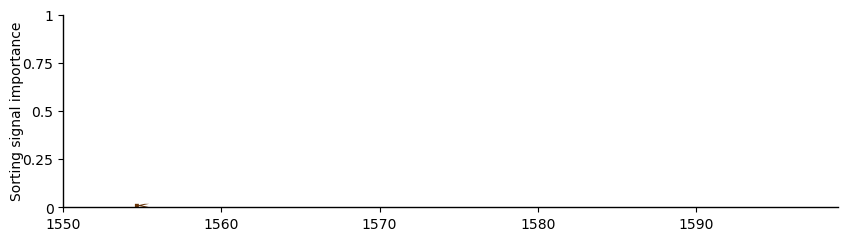

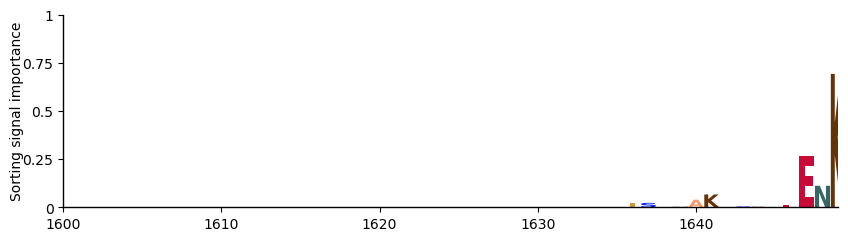

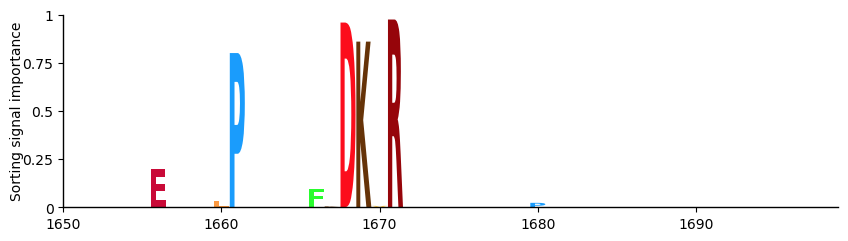

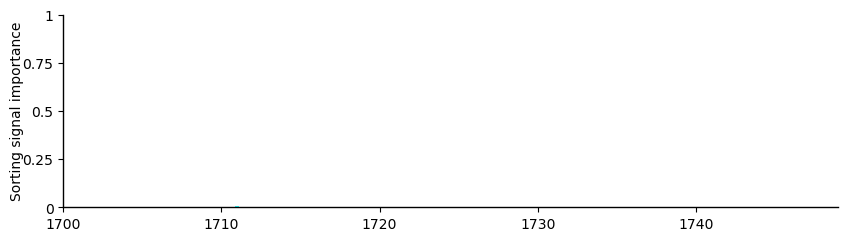

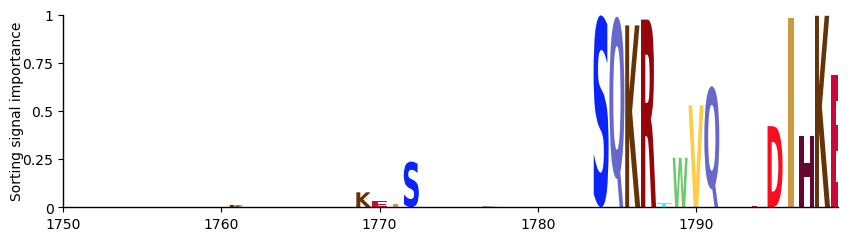

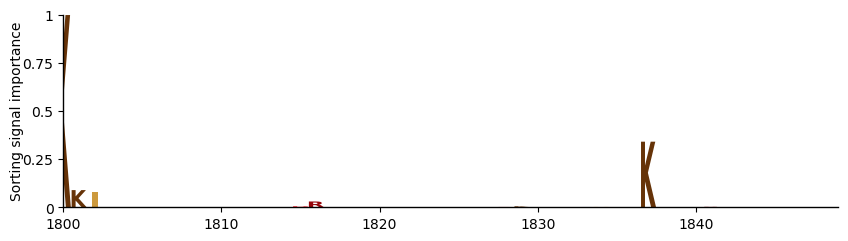

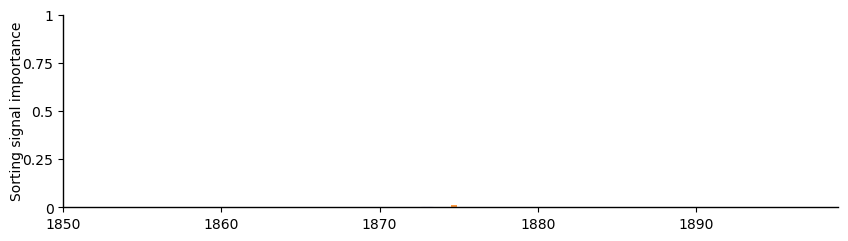

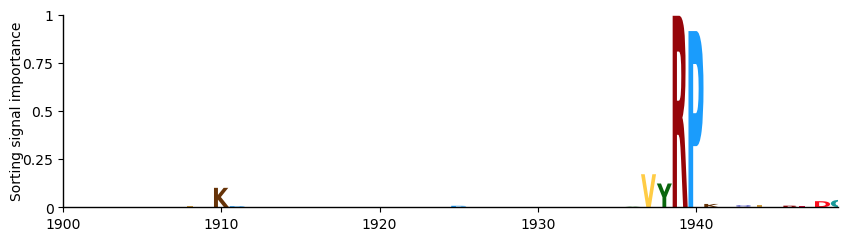

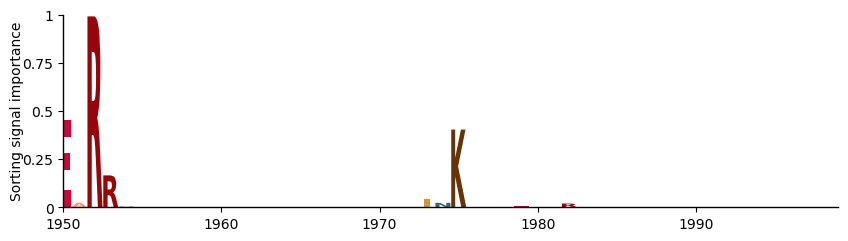

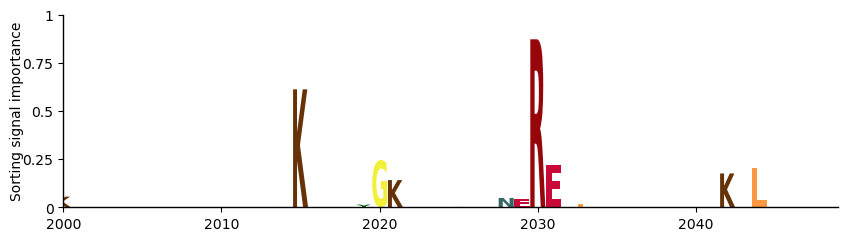

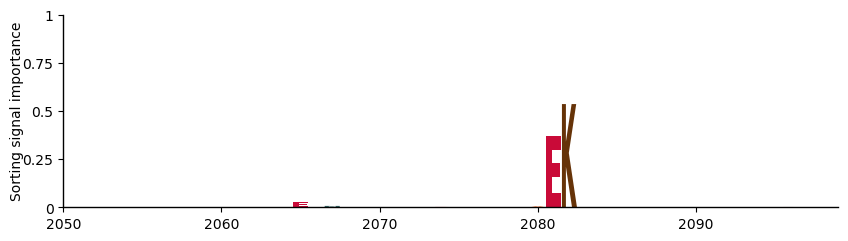

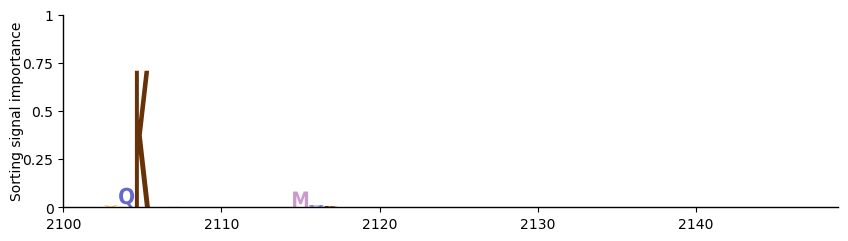

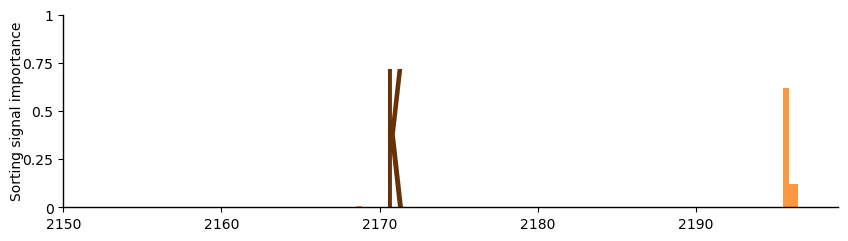

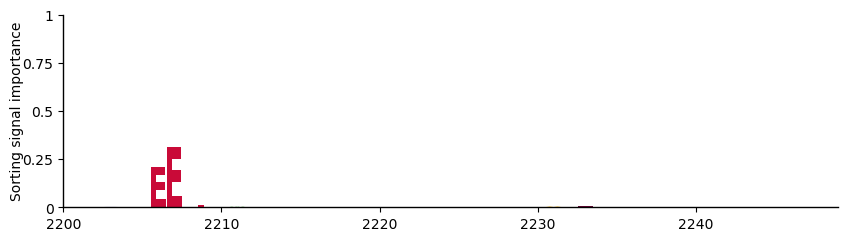

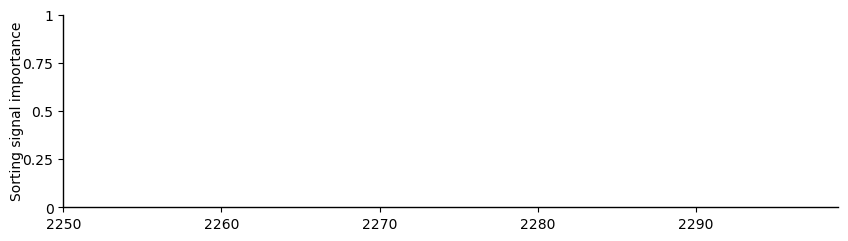

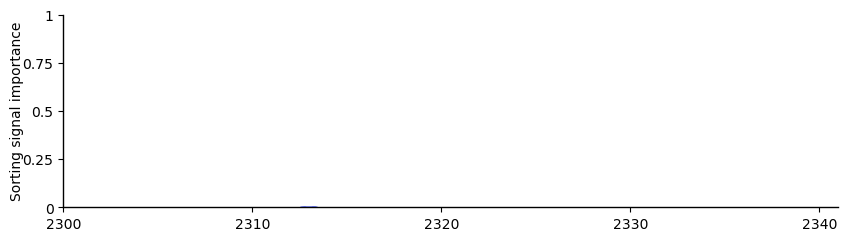

In [6]:
# Example 2
sequence = """MDGVSSEANEENDNIERPVRRRHSSILKPPRSPLQDLRGGNERVQESNALRNKKNSRRVS
FADTIKVFQTESHMKIVRKSEMEGCSAMVPSQLQLLPPGFKRFSCLSLPETETGENLLLI
QNKKLEDNYCEITGMNTLLSAPIHTQMQQKEFSIIEHTRERKHANDQTVIFSDENQMDLT
SSHTVMITKGLLDNPISEKSTKIDTTSFLANLKLHTEDSRMKKEVNFSVDQNTSSENKID
FNDFIKRLKTGKCSAFPDVPDKENFEIPIYSKEPNSASSTHQMHVSLKEDENNSNITRLF
REKDDGMNFTQCHTANIQTLIPTSSETNSRESKGNDITIYGNDFMDLTFNHTLQILPATG
NFSEIENQTQNAMDVTTGYGTKASGNKTVFKSKQNTAFQDLSINSADKIHITRSHIMGAE
THIVSQTCNQDARILAMTPESIYSNPSIQGCKTVFYSSCNDAMEMTKCLSNMREEKNLLK
HDSNYAKMYCNPDAMSSLTEKTIYSGEENMDITKSHTVAIDNQIFKQDQSNVQIAAAPTP
EKEMMLQNLMTTSEDGKMNVNCNSVPHVSKERIQQSLSNPLSISLTDRKTELLSGENMDL
TESHTSNLGSQVPLAAYNLAPESTSESHSQSKSSSDECEEITKSRNEPFQRSDIIAKNSL
TDTWNKDKDWVLKILPYLDKDSPQSADCNQEIATSHNIVYCGGVLDKQITNRNTVSWEQS
LFSTTKPLFSSGQFSMKNHDTAISSHTVKSVLGQNSKLAEPLRKSLSNPTPDYCHDKMII
CSEEEQNMDLTKSHTVVIGFGPSELQELGKTNLEHTTGQLTTMNRQIAVKVEKCGKSPIE
KSGVLKSNCIMDVLEDESVQKPKFPKEKQNVKIWGRKSVGGPKIDKTIVFSEDDKNDMDI
TKSYTIEINHRPLLEKRDCHLVPLAGTSETILYTCRQDDMEITRSHTTALECKTVSPDEI
TTRPMDKTVVFVDNHVELEMTESHTVFIDYQEKERTDRPNFELSQRKSLGTPTVICTPTE
ESVFFPGNGESDRLVANDSQLTPLEEWSNNRGPVEVADNMELSKSATCKNIKDVQSPGFL
NEPLSSKSQRRKSLKLKNDKTIVFSENHKNDMDITQSCMVEIDNESALEDKEDFHLAGAS
KTILYSCGQDDMEITRSHTTALECKTLLPNEIAIRPMDKTVLFTDNYSDLEVTDSHTVFI
DCQATEKILEENPKFGIGKGKNLGVSFPKDNSCVQEIAEKQALAVGNKIVLHTEQKQQLF
AATNRTTNEIIKFHSAAMDEKVIGKVVDQACTLEKAQVESCQLNNRDRRNVDFTSSHATA
VCGSSDNYSCLPNVISCTDNLEGSAMLLCDKDEEKANYCPVQNDLAYANDFASEYYLESE
GQPLSAPCPLLEKEEVIQTSTKGQLDCVITLHKDQDLIKDPRNLLANQTLVYSQDLGEMT
KLNSKRVSFKLPKDQMKVYVDDIYVIPQPHFSTDQPPLPKKGQSSINKEEVILSKAGNKS
LNIIENSSAPICENKPKILNSEEWFAAACKKELKENIQTTNYNTALDFHSNSDVTKQVIQ
THVNAGEAPDPVITSNVPCFHSIKPNLNNLNGKTGEFLAFQTVHLPPLPEQLLELGNKAH
NDMHIVQATEIHNINIISSNAKDSRDEENKKSHNGAETTSLPPKTVFKDKVRRCSLGIFL
PRLPNKRNCSVTGIDDLEQIPADTTDINHLETQPVSSKDSGIGSVAGKLNLSPSQYINEE
NLPVYPDEINSSDSINIETEEKALIETYQKEISPYENKMGKTCNSQKRTWVQEEEDIHKE
KKIRKNEIKFSDTTQDREIFDHHTEEDIDKSANSVLIKNLSRTPSSCSSSLDSIKADGTS
LDFSTYRSSQMESQFLRDTICEESLREKLQDGRITIREFFILLQVHILIQKPRQSNLPGN
FTVNTPPTPEDLMLSQYVYRPKIQIYREDCEARRQKIEELKLSASNQDKLLVDINKNLWE
KMRHCSDKELKAFGIYLNKIKSCFTKMTKVFTHQGKVALYGKLVQSAQNEREKLQIKIDE
MDKILKKIDNCLTEMETETKNLEDEEKNNPVEEWDSEMRAAEKELEQLKTEEEELQRNLL
ELEVQKEQTLAQIDFMQKQRNRTEELLDQLSLSEWDVVEWSDDQAVFTFVYDTIQLTITF
EESVVGFPFLDKRYRKIVDVNFQSLLDEDQAPPSSLLVHKLIFQYVEEKESWKKTCTTQH
QLPKMLEEFSLVVHHCRLLGEEIEYLKRWGPNYNLMNIDINNNELRLLFSSSAAFAKFEI
TLFLSAYYPSVPLPSTIQNHVGNTSQDDIATILSKVPLENNYLKNVVKQIYQDLFQDCHF
YH"""
sequence = sequence.replace('\n','')

sequence_scores, results = compute_scores(nls_pssm, sequence, threshold=2)

print(f"The scores are {sequence_scores}")
print()
for index, score in results:
    print(f"Match begins at {index+1} with score {score} and amino acid {sequence[index]}")

generate_logo(sequence, sequence_scores)